In [1]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


if ('sc' in locals() or 'sc' in globals()):
    printmd('<<<<<!!!!! It seems that you are running in a IBM Watson Studio Apache Spark Notebook. Please run it in an IBM Watson Studio Default Runtime (without Apache Spark) !!!!!>>>>>')

In [2]:
!pip install pyspark==2.4.5

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [3]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [4]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [5]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2021-05-04 15:51:09--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2021-05-04 15:51:09--  https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet [following]
--2021-05-04 15:51:09--  https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/coursera_ds/washing.parquet [fo

In [6]:
df = spark.read.parquet('washing.parquet')
df.createOrReplaceTempView('washing')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [7]:
df.count()

2058

In [8]:
# the dataframe used here is supposed to be the dataframe from Week 2, but I am using the dataframe from the 
# programming assignment at the end of Week 3, since we are just trying to show how to make some plots
# to recreate this lesson more accurately, one would need to figure out how to grab the dataframe from week 2
# but I don't think it matters

In [9]:
# next issue an SQL query to get a voltage value
# note that we want only the ones that contain a value

In [10]:
result = spark.sql("select voltage from washing where voltage is not null")

In [11]:
# ok no errors, so what is in there?

In [12]:
result.collect()

[Row(voltage=236),
 Row(voltage=235),
 Row(voltage=228),
 Row(voltage=236),
 Row(voltage=233),
 Row(voltage=226),
 Row(voltage=235),
 Row(voltage=220),
 Row(voltage=225),
 Row(voltage=239),
 Row(voltage=230),
 Row(voltage=236),
 Row(voltage=244),
 Row(voltage=235),
 Row(voltage=234),
 Row(voltage=224),
 Row(voltage=225),
 Row(voltage=223),
 Row(voltage=236),
 Row(voltage=226),
 Row(voltage=227),
 Row(voltage=237),
 Row(voltage=233),
 Row(voltage=226),
 Row(voltage=222),
 Row(voltage=228),
 Row(voltage=227),
 Row(voltage=228),
 Row(voltage=232),
 Row(voltage=225),
 Row(voltage=229),
 Row(voltage=224),
 Row(voltage=235),
 Row(voltage=233),
 Row(voltage=226),
 Row(voltage=239),
 Row(voltage=238),
 Row(voltage=222),
 Row(voltage=226),
 Row(voltage=236),
 Row(voltage=230),
 Row(voltage=235),
 Row(voltage=237),
 Row(voltage=225),
 Row(voltage=228),
 Row(voltage=221),
 Row(voltage=232),
 Row(voltage=221),
 Row(voltage=230),
 Row(voltage=231),
 Row(voltage=220),
 Row(voltage=235),
 Row(voltage

In [13]:
# we have the voltages, but it looks like each on is wrapped in a row object

# dataframes are a wrapper around RDD's, so we can always access the RDD inside
# using the RDD API.  We use the lambda function to access teh individual instances
# the row wrapper object, and take teh first 10 results:

In [14]:
result.rdd.map(lambda row : row.voltage).take(10)

[236, 235, 228, 236, 233, 226, 235, 220, 225, 239]

In [15]:
#  that worked.  Now we want to have a random sample of all the data that is in there
#  so we use the sample function for that.  Strictly speaking, this is not neccessary
#  for this data set, but we demonstrate it here since data sets could potentially contain
#  millions of rows etc.  Within the parameter to the sample() function, we give the 
#  percentage of the original dataset we want to take: 0.1 or 10%
#  if you have lot of data then maybe 0.01 or 0.001 would be more appropriate
#  as a rule of thumb, we don't really need more than 100 data points, so if you ahve 10,000 data points
#  then use 0.01, etc.
#  the issue here is that we need to pass the data to a plotting libarary like matplotlib
#  since the plotting code is executed on a single machine, passing billions of data points
#  won't work

# the result we obtain is a plain old Python data type and not an RDD

In [16]:
result_array = result.rdd.map(lambda row : row.voltage).sample(False, 0.1).collect()
result_array

[233,
 227,
 237,
 228,
 239,
 235,
 237,
 248,
 235,
 233,
 223,
 232,
 239,
 227,
 244,
 227,
 221,
 224,
 222,
 234,
 226,
 232,
 242,
 225,
 223,
 225,
 232,
 231,
 232,
 236,
 251,
 228,
 234,
 238,
 234,
 230,
 223,
 238,
 239,
 235,
 236,
 221,
 226,
 221,
 239,
 255,
 229,
 223,
 221]

In [17]:
# now we have a meaningful array containing integer values reflecting the 
# voltage of the power source of the washing machine at different points in time 

In [18]:
# set the inline parameter
# this is an instruction sent to the ipython kernel running inside of the jupyter notebook
# this is actually not part of matplotlib itself
%matplotlib inline

In [19]:
# next import matplotlib
import matplotlib.pyplot as plt

In [20]:
# box plots

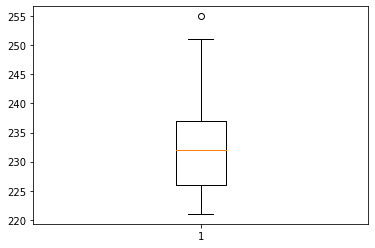

In [21]:
# generate and show the plot
plt.boxplot(result_array)
plt.show()

In [22]:
# we can see a number of things from this plot:  1.) the mean, 
# 2.) some idea of the strandard deviation is shown by the interquartile range which is the distance
# between the 25th and 75th percentile, which is represented by the actual box
# 50% of all data, by defintion, lies inside the box.
# the outliers are easily seen as beyong the two T shapes near the ends

In [23]:
# run charts
# used with stock market data, like IOT sensor data, they are also time series data
# we need to go back and fetch the time dimension from the data set in order
# to make a run chart

In [24]:
# within the SQL query, we need to get the time stamp on the voltage data
# in relational algebra, this is called the "projection list"
# it is important to note that we are never guaranteed that data will be
# stored in the order it was gathered, so we will need to sort by the timestamp
# the timestamp here refers to event time, the time the actual measurement
# occurred, in constrast to processing time, which is the time when the data
# point was entered and stored in the cloud
# we sort by ascending

# we move the sampling to first before we map it, because this cuts down on 
# processing time of this action

# we meed to uppack two values out of the row object since two objects are returned in 
# the query

result_withtime = spark.sql("select voltage,ts from washing where voltage is not null order by ts asc")
result_withtime.collect()

[Row(voltage=221, ts=1547808722910),
 Row(voltage=223, ts=1547808725914),
 Row(voltage=222, ts=1547808728916),
 Row(voltage=236, ts=1547808731918),
 Row(voltage=234, ts=1547808734922),
 Row(voltage=234, ts=1547808737926),
 Row(voltage=235, ts=1547808740927),
 Row(voltage=235, ts=1547808743928),
 Row(voltage=222, ts=1547808746929),
 Row(voltage=225, ts=1547808749929),
 Row(voltage=227, ts=1547808752930),
 Row(voltage=224, ts=1547808755932),
 Row(voltage=235, ts=1547808758933),
 Row(voltage=230, ts=1547808761934),
 Row(voltage=221, ts=1547808764937),
 Row(voltage=224, ts=1547808767938),
 Row(voltage=239, ts=1547808770939),
 Row(voltage=228, ts=1547808773944),
 Row(voltage=235, ts=1547808776948),
 Row(voltage=220, ts=1547808779950),
 Row(voltage=220, ts=1547808782951),
 Row(voltage=232, ts=1547808785954),
 Row(voltage=236, ts=1547808788955),
 Row(voltage=238, ts=1547808791957),
 Row(voltage=224, ts=1547808794957),
 Row(voltage=233, ts=1547808797959),
 Row(voltage=226, ts=1547808800960),
 

In [25]:
result_array_withtime = result_withtime.rdd.sample(False, 0.1).map(lambda row : (row.ts, row.voltage)).collect()
result_array_withtime

[(1547808737926, 234),
 (1547808752930, 227),
 (1547808797959, 233),
 (1547808806965, 221),
 (1547808846029, 233),
 (1547808900085, 221),
 (1547808975148, 238),
 (1547808981157, 228),
 (1547808993170, 253),
 (1547809053217, 226),
 (1547809077231, 220),
 (1547809131265, 225),
 (1547809182314, 225),
 (1547809215330, 237),
 (1547809317399, 251),
 (1547809326401, 224),
 (1547809332403, 222),
 (1547809335405, 224),
 (1547809341407, 239),
 (1547809356412, 231),
 (1547809398443, 229),
 (1547809476494, 223),
 (1547809482500, 232),
 (1547809557551, 236),
 (1547809590576, 237),
 (1547809650606, 237),
 (1547809707654, 238),
 (1547809731669, 223),
 (1547809773702, 225),
 (1547809833735, 220),
 (1547809866750, 226),
 (1547809884755, 234),
 (1547809887762, 232),
 (1547809899768, 247),
 (1547809929781, 231),
 (1547809947789, 238),
 (1547809953793, 238),
 (1547809977801, 226),
 (1547809983803, 232),
 (1547809992810, 234),
 (1547810016817, 230)]

In [26]:
# the result is a list of tuples which include the timestamp
# and the voltage.  So what we need is two python arrays:
# We do this buy just using the map function to pull out each array and store them:

result_rdd = result_withtime.rdd.sample(False, 0.1).map(lambda row : (row.ts, row.voltage))
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_ts

[1547808764937,
 1547808800960,
 1547808836984,
 1547808855034,
 1547808900085,
 1547808903087,
 1547808912091,
 1547808960137,
 1547809095246,
 1547809119261,
 1547809122262,
 1547809149271,
 1547809179312,
 1547809194321,
 1547809233344,
 1547809254357,
 1547809260359,
 1547809284381,
 1547809290387,
 1547809380431,
 1547809506513,
 1547809509517,
 1547809524531,
 1547809545541,
 1547809581566,
 1547809626593,
 1547809665622,
 1547809707654,
 1547809728666,
 1547809788713,
 1547809791714,
 1547809881754,
 1547809887762,
 1547809893765,
 1547809926781,
 1547809938785]

In [27]:
result_array_voltage

[221,
 226,
 224,
 221,
 221,
 220,
 236,
 223,
 237,
 223,
 235,
 232,
 230,
 239,
 236,
 222,
 221,
 228,
 221,
 224,
 234,
 227,
 221,
 233,
 229,
 238,
 230,
 238,
 221,
 227,
 223,
 239,
 232,
 257,
 220,
 236]

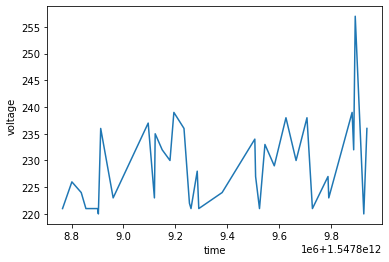

In [28]:
# so that worked
# now we  can create the run chart.
#  the x axis is given first and is the time stamp

plt.plot(result_array_ts, result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

In [29]:
# scatter plots

In [30]:
# once plotted, can be used for defining classification boundaries
# or clusters of similar data or detecting outliers from
# normal behavior

In [31]:
# we want to plot, hardness, temperature and flow rate

result_df = spark.sql("select hardness, temperature, flowrate from washing where hardness is not null and temperature is not null and  flowrate is not null")
result_df.collect()

[Row(hardness=77, temperature=100, flowrate=11),
 Row(hardness=75, temperature=86, flowrate=11),
 Row(hardness=73, temperature=84, flowrate=11),
 Row(hardness=79, temperature=84, flowrate=11),
 Row(hardness=72, temperature=96, flowrate=11),
 Row(hardness=73, temperature=88, flowrate=11),
 Row(hardness=77, temperature=87, flowrate=11),
 Row(hardness=79, temperature=96, flowrate=11),
 Row(hardness=73, temperature=90, flowrate=11),
 Row(hardness=77, temperature=88, flowrate=11),
 Row(hardness=75, temperature=80, flowrate=11),
 Row(hardness=78, temperature=82, flowrate=11),
 Row(hardness=72, temperature=87, flowrate=11),
 Row(hardness=160, temperature=96, flowrate=11),
 Row(hardness=195, temperature=89, flowrate=11),
 Row(hardness=74, temperature=86, flowrate=11),
 Row(hardness=80, temperature=84, flowrate=11),
 Row(hardness=80, temperature=95, flowrate=11),
 Row(hardness=80, temperature=89, flowrate=11),
 Row(hardness=77, temperature=90, flowrate=11),
 Row(hardness=70, temperature=96, flo

In [32]:
# we have to unwrap the row object again:

result_rdd = result_df.rdd.sample(False, 0.1).map(lambda row : (row.hardness, row.temperature, row.flowrate))
result_array_hardness = result_rdd.map(lambda htf: htf[0]).collect()
result_array_temp = result_rdd.map(lambda htf: htf[1]).collect()
result_array_flow = result_rdd.map(lambda htf: htf[2]).collect()

result_array_hardness

[125,
 75,
 75,
 76,
 70,
 155,
 165,
 75,
 73,
 77,
 105,
 135,
 74,
 70,
 76,
 75,
 91,
 77,
 76,
 73,
 145,
 115,
 92,
 73,
 76,
 73,
 78,
 72,
 80,
 72,
 73,
 74,
 80,
 165,
 74,
 77,
 138,
 75,
 73,
 71,
 115,
 77,
 75,
 76,
 77,
 140,
 91,
 79,
 70,
 72,
 79,
 72,
 74,
 78,
 75,
 73,
 71,
 76,
 79,
 70,
 73,
 73,
 77,
 76,
 71,
 72,
 108,
 76,
 77,
 71,
 74,
 165,
 80,
 80,
 74,
 77,
 88,
 71,
 70,
 80,
 80,
 71,
 75,
 72,
 72,
 79,
 71,
 72,
 79,
 77,
 160,
 70,
 77,
 75,
 72,
 70,
 75,
 78,
 74,
 80,
 79,
 72,
 143,
 72,
 72,
 73,
 72,
 74,
 123,
 70,
 73,
 125,
 155,
 76,
 72,
 123,
 79,
 86,
 77,
 78,
 72,
 70,
 75,
 77,
 70,
 74,
 78,
 74]

In [33]:
result_array_temp

[88,
 90,
 92,
 97,
 85,
 97,
 100,
 100,
 88,
 80,
 97,
 86,
 83,
 88,
 98,
 93,
 85,
 80,
 100,
 87,
 87,
 98,
 81,
 95,
 83,
 94,
 83,
 87,
 97,
 97,
 80,
 98,
 98,
 95,
 85,
 81,
 95,
 81,
 99,
 93,
 93,
 82,
 99,
 93,
 80,
 95,
 85,
 100,
 90,
 96,
 88,
 81,
 94,
 100,
 81,
 83,
 92,
 100,
 95,
 90,
 95,
 100,
 85,
 84,
 82,
 89,
 83,
 94,
 98,
 90,
 91,
 90,
 97,
 91,
 88,
 98,
 88,
 83,
 94,
 98,
 93,
 88,
 80,
 84,
 95,
 84,
 84,
 90,
 86,
 86,
 99,
 81,
 83,
 92,
 81,
 89,
 85,
 89,
 84,
 81,
 89,
 98,
 94,
 95,
 85,
 99,
 83,
 80,
 95,
 100,
 85,
 99,
 98,
 97,
 86,
 98,
 83,
 92,
 81,
 91,
 81,
 93,
 90,
 88,
 99,
 98,
 84,
 96]

In [34]:
result_array_flow

[11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11]

In [35]:
from mpl_toolkits.mplot3d import Axes3D

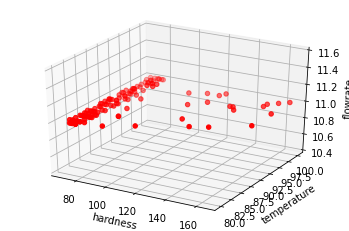

In [36]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(result_array_hardness,result_array_temp,result_array_flow, c='r', marker='o')

ax.set_xlabel('hardness')
ax.set_ylabel('temperature')
ax.set_zlabel('flowrate')

plt.show()

In [37]:
# historgrams

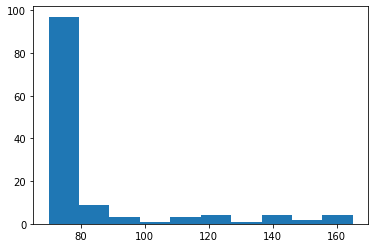

In [38]:
plt.hist(result_array_hardness)
plt.show()

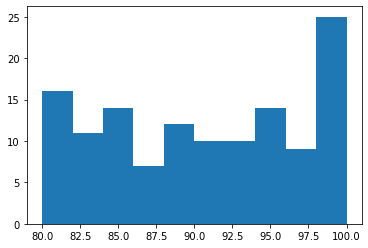

In [39]:
plt.hist(result_array_temp)
plt.show()

In [40]:
# [end]